# __Multi-Layer Perceptron Learning in Tensorflow__

__Date :__ 14, July, 2024. 

- Multi-layer perception is also known as MLP. It is fully connected dense layers, which transform any input dimension to the desired dimension.

- A multi-layer perception is a neural network that has multiple layers. To create a neural network we combine neurons together so that the outputs of some neurons are inputs of other neurons.

__How Multi-layer Perceptron Work?__

- A multi-layer perceptron has one input layer and for each input, there is one neuron(or node).

- It has one output layer with a single node for each output.

- It can have any number of hidden layers and each hidden layer can have any number of nodes.

- Every node in the multi-layer perception uses a sigmoid activation function.

__Sigmoid Function__

- The sigmoid activation function takes real values as input and converts them to numbers between 0 and 1 using the sigmoid formula.
``` bash
α(x) = 1 / (1 + exp(-x))

       or

σ(x) = 1 / (1 + e^-x) 

```

__Where,__ 

- x -> Input value (Which can be any real number)
- e -> Base of natural logarithm == 2.71828
- (1 + e^-x) -> Always positive
- 1/(1 + e^-x) -> Always greater thab zero

# `Stepwise Implementation`

`Step 1:` Import the necessary libraries. 

In [36]:
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation


- **Sequential**: A linear stack of layers from Keras, used to build a neural network model.
- **Flatten**: A Keras layer that flattens the input. This layer is often used to flatten the input shape before feeding it into a fully connected (dense) layer.
- **Dense**: A Keras layer that is fully connected, meaning every neuron in the layer is connected to every neuron in the previous layer.

`Step 2:` Download the dataset.

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

`Step 3:` Now we will convert the pixels into floating-point values.

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

gray_scale = 255

x_train /= gray_scale
x_test /= gray_scale

- __Casting to float values:__ Image data is often loaded as integers (e.g., 8-bit integers with values from 0 to 255). Casting to __'float32'__ is necessary because neural networks typically work with floating-point numbers.

- __Grayscale :__ Images composed of varying shades of gray, where each pixel's intensity value ranges from 0 (black) to 255 (white).

- __Normalization:__ Normalizing the pixel values by dividing by 255 scales the values to the range [0, 1]. This helps improve the training process and gives stabilization of the neural network by providing a consistent range of input values.

`Step 4:` Understand the structure of the dataset

In [5]:
print("Feature Matrix :", x_train.shape)
print("Target Matrix :", x_test.shape)
print("Feature Matrix :", y_train.shape)
print("Target Matrix :", y_test.shape)

Feature Matrix : (60000, 28, 28)
Target Matrix : (10000, 28, 28)
Feature Matrix : (60000,)
Target Matrix : (10000,)


`Step 5:` Visualize the data.

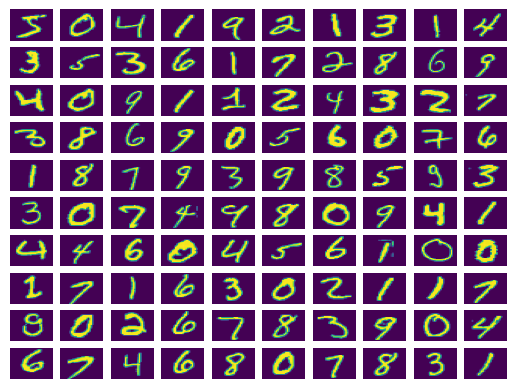

In [14]:
fig, ax = plt.subplots(10, 10) 
k = 0
for i in range(10):
    for j in range(10):
        ax[i, j].imshow(x_train[k].reshape(28, 28), aspect='auto')
        ax[i, j].axis('off')  # Hide the axes for better visualization
        k += 1

plt.show()

- **`plt.subplots(10, 10, figsize=(10, 10))`**: Creates a figure with a 10x10 grid of subplots. The `figsize` parameter adjusts the size of the figure.
            
- **`ax[i, j].imshow(...)`**: Plots the image in the `i, j`-th subplot.
            
- **`ax[i, j].axis('off')`**: Hides the axes to improve visualization.

- **`plt.show()`**: Displays the plot.

`Step 6:` Form the Input, hidden, and output layers.

In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), 
    tf.keras.layers.Dense(256, activation = 'sigmoid'), 
    tf.keras.layers.Dense(128, activation = 'sigmoid'), 
    tf.keras.layers.Dense(10, activation = 'sigmoid'),
])

C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


- **Sequential Model**: `Sequential()` allows you to create models layer-by-layer sequentially. Each layer's output becomes the input for the next layer.

- **Flatten Layer**: `Flatten(input_shape=(28, 28))` transforms the input from a 2D shape (28 rows, 28 columns) into a 1D array (784 elements). This layer is necessary because the subsequent dense layers require a flat input.

-  **Dense Layers**:
   - **First Dense Layer**: `Dense(256, activation='sigmoid')` creates a fully connected layer with 256 neurons. The `sigmoid` activation function squashes the output to a range between 0 and 1, suitable for binary classification or when the output needs to be interpreted as probabilities.
   
   - **Second Dense Layer**: `Dense(128, activation='sigmoid')` creates another fully connected layer with 128 neurons, also using the `sigmoid` activation function.
   
   - **Output Layer**: `Dense(10, activation='sigmoid')` is the output layer with 10 neurons, each representing a class in a multi-class classification problem (assuming 10 classes). The `sigmoid` activation function is used here as well, but for classification tasks, `softmax` activation is typically used to output probabilities for each class.


`Step 7:` Compile the model.

In [39]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

The `model.compile()` function in TensorFlow is used to configure the model for training. 

`Step 8:` Fit the model.

In [40]:
model.fit(x_train, y_train, epochs = 10, 
          batch_size = 2000, 
          validation_split = 0.2)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1974 - loss: 2.3231 - val_accuracy: 0.6461 - val_loss: 1.8464
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6665 - loss: 1.7004 - val_accuracy: 0.7711 - val_loss: 1.2031
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7663 - loss: 1.1090 - val_accuracy: 0.8368 - val_loss: 0.7858
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8379 - loss: 0.7498 - val_accuracy: 0.8796 - val_loss: 0.5724
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8728 - loss: 0.5692 - val_accuracy: 0.8947 - val_loss: 0.4576
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8903 - loss: 0.4599 - val_accuracy: 0.9043 - val_loss: 0.3920
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8988 - loss: 0.4020 - val_accuracy: 0.9100 - val_loss: 0.3506
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9081 - loss: 0.3561 - val_accuracy: 0.9155 - v

- __Epochs :__ 
    - Number of times the model will iterate over the entire dataset during training. Each epoch consists of one forward pass and one backward pass (gradient update) of all the training examples.

    - `Forward Pass:` Propagates input data through the neural network to produce predictions.

    - `Backward Pass (Backpropagation):` Computes gradients of the loss function with respect to model parameters to update weights and biases during training.

    - `Gradient:` The rate of change of a function with respect to its variables; a vector that points in the direction of the greatest rate of increase of the function.

- __Batch Processing :__ Number of samples per gradient update. In other words, the model will update its weights after processing each batch of 2000 samples. Larger batch sizes can speed up training but may require more memory.

- __Validation Split :__ `'validation_split=0.2'`
    - Fraction of the training data to be used as validation data. The model will not be trained on this data and will instead evaluate the loss and any model metrics on this data at the end of each epoch. Here, 20% of the training data (x_train and y_train) will be used for validation.


`Step 9:` Find Accuracy of the model.

In [42]:
results = model.evaluate(x_test, y_test, verbose = 0)
print('test_loss, test_accuracy :', results)

test_loss, test_accuracy : [0.2883574962615967, 0.9197999835014343]


`verbose=0`: This parameter controls the verbosity of the evaluation process. Setting `verbose=0` means silent mode, where no output will be printed during evaluation.

                                We got the accuracy of our model 92% by using model.evaluate() on the test samples.                                     